In [1]:
import bitcoin
prices = bitcoin.history(granularity=300)
prices.head()

,time,low,high,open,close,volume,percent
0,1519106700,11450.00,11456.36,11450.09,11450.00,18.503075,-0.000786
1,1519107000,11435.45,11469.99,11450.00,11456.87,18.426547,0.060000
2,1519107300,11437.62,11464.15,11453.72,11458.70,13.464636,0.043479
3,1519107600,11446.00,11452.00,11451.00,11451.99,13.055801,0.008646
4,1519107900,11451.99,11458.00,11452.00,11453.46,8.543182,0.012749


In [2]:
prices.describe()

,time,low,high,open,close,volume,percent
count,3.510000e+02,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,1.519159e+09,11294.839174,11339.302450,11318.621282,11317.129943,22.586431,-0.012522
std,3.044076e+04,295.629890,281.716269,288.175283,288.985314,18.929121,0.409889
min,1.519107e+09,10650.010000,10745.210000,10710.620000,10711.270000,0.537131,-2.127377
25%,1.519133e+09,11029.405000,11077.605000,11055.970000,11052.500000,10.199584,-0.184540
50%,1.519159e+09,11351.990000,11398.010000,11377.240000,11376.070000,16.471751,0.019591
75%,1.519185e+09,11538.005000,11569.285000,11555.245000,11555.245000,26.792626,0.187756
max,1.519212e+09,11744.990000,11775.000000,11757.950000,11770.000000,112.818154,1.474203


In [3]:
prices.corr()

,time,low,high,open,close,volume,percent
time,1.000000,-0.667419,-0.674624,-0.668377,-0.670720,0.125270,-0.025783
low,-0.667419,1.000000,0.991733,0.991759,0.996683,-0.137201,0.047582
high,-0.674624,0.991733,1.000000,0.995437,0.993453,-0.059368,0.004890
open,-0.668377,0.991759,0.995437,1.000000,0.987270,-0.092696,-0.062809
close,-0.670720,0.996683,0.993453,0.987270,1.000000,-0.105434,0.096685
volume,0.125270,-0.137201,-0.059368,-0.092696,-0.105434,1.000000,-0.079866
percent,-0.025783,0.047582,0.004890,-0.062809,0.096685,-0.079866,1.000000


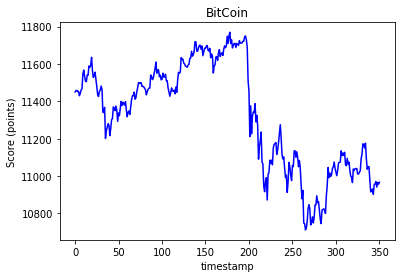

In [4]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.show()

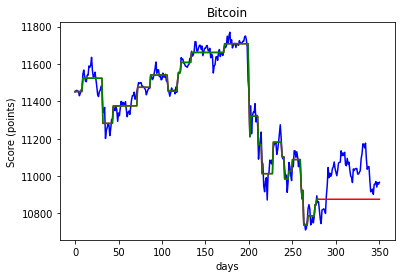

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

X = np.arange(len(prices)).reshape(-1, 1)
y = np.array(prices['close'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

y_predict_train = tree_reg.predict(X_train)
y_predict = tree_reg.predict(X)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.plot(y_predict, 'r')
plt.plot(y_predict_train, 'g')
plt.show()

In [6]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [7]:
numpy.random.seed(42)

In [8]:
dataset = prices['close'].values.reshape(-1, 1)
dataset = dataset.astype('float32')

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
from sklearn.model_selection import train_test_split
X = np.arange(len(dataset)).reshape(-1, 1)
y = np.array(dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
numpy.random.seed(42)

model = Sequential()

model.add(LSTM(400, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, batch_size=280, epochs=25, validation_data=(X_test, y_test))

Train on 280 samples, validate on 71 samples
Epoch 1/25
280/280 [==============================] - 1s - loss: 0.3705 - val_loss: 0.2000
Epoch 2/25
280/280 [==============================] - 0s - loss: 0.0959 - val_loss: 0.5894
Epoch 3/25
280/280 [==============================] - 0s - loss: 0.2067 - val_loss: 0.5270
Epoch 4/25
280/280 [==============================] - 0s - loss: 0.1922 - val_loss: 0.3013
Epoch 5/25
280/280 [==============================] - 0s - loss: 0.1098 - val_loss: 0.1245
Epoch 6/25
280/280 [==============================] - 0s - loss: 0.0717 - val_loss: 0.0397
Epoch 7/25
280/280 [==============================] - 0s - loss: 0.0824 - val_loss: 0.0142
Epoch 8/25
280/280 [==============================] - 0s - loss: 0.1068 - val_loss: 0.0102
Epoch 9/25
280/280 [==============================] - 0s - loss: 0.1168 - val_loss: 0.0121
Epoch 10/25
280/280 [==============================] - 0s - loss: 0.1035 - val_loss: 0.0216
Epoch 11/25
280/280 [=======================

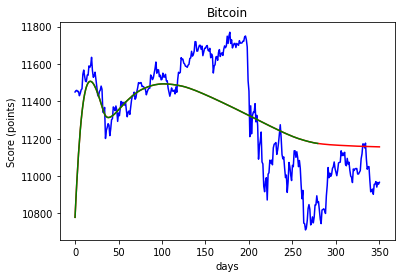

In [30]:
X = numpy.reshape(X, (X.shape[0], X.shape[1], 1))
y_predict_train = model.predict(X_train)
y_predict_train = scaler.inverse_transform(y_predict_train)
y_predict = model.predict(X)
y_predict = scaler.inverse_transform(y_predict)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.plot(y_predict, 'r')
plt.plot(y_predict_train, 'g')
plt.show()